<a href="https://colab.research.google.com/github/TQT2203/BTVN-AI/blob/main/Bai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn file zip ƒë√£ upload
zip_path = "/content/Bai3.zip"  # ƒê√∫ng ƒë∆∞·ªùng d·∫´n khi b·∫°n upload

# Th∆∞ m·ª•c gi·∫£i n√©n
extract_path = "/content/Bai3"

# Gi·∫£i n√©n
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("‚úÖ ƒê√£ gi·∫£i n√©n th√†nh c√¥ng!")


‚úÖ ƒê√£ gi·∫£i n√©n th√†nh c√¥ng!


In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu g·ªëc sau khi gi·∫£i n√©n
dataset_dir = "/content/Bai3/bottle"

# Th∆∞ m·ª•c ƒë√≠ch ch·ª©a d·ªØ li·ªáu ƒë√£ chia
output_dir = "/content/dataset"

# T·∫°o th∆∞ m·ª•c train/val v√† c√°c l·ªõp con
for split in ['train', 'val']:
    for category in ['dat_yeu_cau', 'nap_chai_long', 'nhan_chai_rach', 'sai_mau_nuoc']:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Chia d·ªØ li·ªáu
for category in ['dat_yeu_cau', 'nap_chai_long', 'nhan_chai_rach', 'sai_mau_nuoc']:
    category_path = os.path.join(dataset_dir, category)
    images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

    train_imgs, val_imgs = train_test_split(images, test_size=0.3, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'train', category, img))

    for img in val_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'val', category, img))

print("‚úÖ ƒê√£ chia t·∫≠p train/val th√†nh c√¥ng!")


‚úÖ ƒê√£ chia t·∫≠p train/val th√†nh c√¥ng!


In [3]:
from PIL import Image
import numpy as np

IMG_SIZE = (640, 640)

def resize_and_normalize_image(image_path, output_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMG_SIZE, Image.Resampling.LANCZOS)
    img_array = np.array(img) / 255.0
    img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
    img_normalized.save(output_path)

# Resize t·∫•t c·∫£ ·∫£nh trong train/val
for split in ['train', 'val']:
    for category in ['dat_yeu_cau', 'nap_chai_long', 'nhan_chai_rach', 'sai_mau_nuoc']:
        folder = os.path.join(output_dir, split, category)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            if os.path.isfile(img_path):
                resize_and_normalize_image(img_path, img_path)

print("‚úÖ ƒê√£ resize v√† chu·∫©n h√≥a ·∫£nh th√†nh c√¥ng!")


‚úÖ ƒê√£ resize v√† chu·∫©n h√≥a ·∫£nh th√†nh c√¥ng!


In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(640, 640, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Th√™m ki·ªÉm tra d·ªØ li·ªáu
class_weights = {0: 1., 1: 1.}  # C√¢n b·∫±ng n·∫øu dataset b·ªã m·∫•t c√¢n b·∫±ng

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(640, 640),
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset/val',
    target_size=(640, 640),
    class_mode='binary'
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 640, 640, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 640, 640, 32)   ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 640, 640, 32)   ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 640, 640, 32)   ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 320, 320, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 320, 320, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 320, 320, 64)   ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 320, 320, 64)   ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 320, 320, 64)   ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 320, 320, 64)   ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 1,472,033 (5.62 MB)

 Trainable params: 1,470,113 (5.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

Found 17 images belonging to 5 classes.
Found 11 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 123s 123s/step - accuracy: 0.4118 - loss: 1.2847 - val_accuracy: 0.3636 - val_loss: 1.8112
Epoch 2/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 123s 123s/step - accuracy: 0.4118 - loss: -0.0428 - val_accuracy: 0.3636 - val_loss: 1.7707
Epoch 3/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 96s 96s/step - accuracy: 0.4118 - loss: -1.2070 - val_accuracy: 0.3636 - val_loss: 1.7320
Epoch 4/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95s 95s/step - accuracy: 0.4118 - loss: -1.0073 - val_accuracy: 0.3636 - val_loss: 1.5915
Epoch 5/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 152s 152s/step - accuracy: 0.4118 - loss: -4.8651 - val_accuracy: 0.3636 - val_loss: 1.3468
Epoch 6/10
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95s 95s/step - accuracy: 0.4118 - loss: -8.2731 - val_accuracy: 0.3636 - val_loss: 0.8730

In [5]:
model.save('bai3.h5')

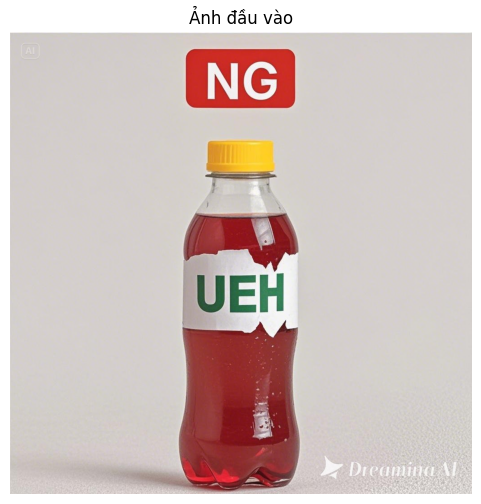

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 460ms/step

üéØ K·∫øt qu·∫£ ph√¢n lo·∫°i:
‚úîÔ∏è Nh√£n d·ª± ƒëo√°n: Nh√£n chai r√°ch
üî¢ X√°c su·∫•t d·ª± ƒëo√°n: [0.94407684]

‚ùå S·∫£n ph·∫©m kh√¥ng ƒë·∫°t y√™u c·∫ßu do: **NH√ÉN CHAI R√ÅCH**


In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# T·∫Øt OneDNN ƒë·ªÉ t∆∞∆°ng th√≠ch CPU (n·∫øu c·∫ßn)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# ƒê∆∞·ªùng d·∫´n ·∫£nh
image_path = r"/content/nhanchai1.jpeg"

# ƒê·ªçc ·∫£nh
img = cv2.imread(image_path)

if img is None:
    print("Kh√¥ng th·ªÉ ƒë·ªçc h√¨nh ·∫£nh. Ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n:", image_path)
else:
    # Hi·ªÉn th·ªã ·∫£nh ƒë·∫ßu v√†o
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('·∫¢nh ƒë·∫ßu v√†o')
    plt.axis('off')
    plt.show()

    # Ti·ªÅn x·ª≠ l√Ω ·∫£nh
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    model = load_model("bai3.h5")

    # C√°c nh√£n l·ªõp (ph·∫£i kh·ªõp th·ª© t·ª± label trong train_generator.class_indices)
    class_labels = ['Nh√£n chai r√°ch','N·∫Øp chai l·ªèng','Sai m√†u n∆∞·ªõc', 'ƒê·∫°t y√™u c·∫ßu']

    # D·ª± ƒëo√°n
    prediction = model.predict(img_resized)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    label = class_labels[predicted_class]

    print("\nüéØ K·∫øt qu·∫£ ph√¢n lo·∫°i:")
    print(f"‚úîÔ∏è Nh√£n d·ª± ƒëo√°n: {label}")
    print(f"üî¢ X√°c su·∫•t d·ª± ƒëo√°n: {prediction[0]}")

    # Di·ªÖn gi·∫£i l·ªói n·∫øu kh√¥ng ƒë·∫°t y√™u c·∫ßu
    if label == "ƒê·∫°t y√™u c·∫ßu":
        print("\n‚úÖ S·∫£n ph·∫©m ƒë·∫°t y√™u c·∫ßu.")
    else:
        print(f"\n‚ùå S·∫£n ph·∫©m kh√¥ng ƒë·∫°t y√™u c·∫ßu do: **{label.replace('_', ' ').upper()}**")
        if confidence < 0.5:
            print(f"‚ö†Ô∏è ƒê·ªô tin c·∫≠y th·∫•p: {confidence:.4f}")


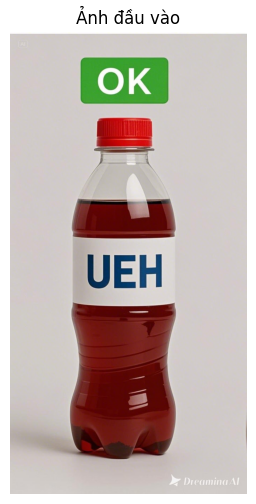

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 909ms/step
 Nh√£n d·ª± ƒëo√°n: ƒê·∫°t y√™u c·∫ßu
 X√°c su·∫•t d·ª± ƒëo√°n: [0.91845363]

‚úÖ S·∫£n ph·∫©m ƒë·∫°t y√™u c·∫ßu.


In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# T·∫Øt OneDNN ƒë·ªÉ t∆∞∆°ng th√≠ch CPU (n·∫øu c·∫ßn)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# ƒê∆∞·ªùng d·∫´n ·∫£nh
image_path = r"/content/chai.jpeg"

# ƒê·ªçc ·∫£nh
img = cv2.imread(image_path)

if img is None:
    print("Kh√¥ng th·ªÉ ƒë·ªçc h√¨nh ·∫£nh. Ki·ªÉm tra l·∫°i ƒë∆∞·ªùng d·∫´n:", image_path)
else:
    # Hi·ªÉn th·ªã ·∫£nh ƒë·∫ßu v√†o
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('·∫¢nh ƒë·∫ßu v√†o')
    plt.axis('off')
    plt.show()

    # Ti·ªÅn x·ª≠ l√Ω ·∫£nh
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Load m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    model = load_model("bai3.h5")

    # C√°c nh√£n l·ªõp (ph·∫£i kh·ªõp th·ª© t·ª± label trong train_generator.class_indices)
    class_labels = ['ƒê·∫°t y√™u c·∫ßu','Nh√£n chai r√°ch','N·∫Øp chai l·ªèng','Sai m√†u n∆∞·ªõc' ]

    # D·ª± ƒëo√°n
    prediction = model.predict(img_resized)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    label = class_labels[predicted_class]


    print(f" Nh√£n d·ª± ƒëo√°n: {label}")
    print(f" X√°c su·∫•t d·ª± ƒëo√°n: {prediction[0]}")

    # Di·ªÖn gi·∫£i l·ªói n·∫øu kh√¥ng ƒë·∫°t y√™u c·∫ßu
    if label == "ƒê·∫°t y√™u c·∫ßu":
        print("\n‚úÖ S·∫£n ph·∫©m ƒë·∫°t y√™u c·∫ßu.")
    else:
        print(f"\n‚ùå S·∫£n ph·∫©m kh√¥ng ƒë·∫°t y√™u c·∫ßu do: **{label.replace('_', ' ').upper()}**")